# Hierarchical Clustering

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
dataset = pd.read_csv("Mall_Customers.csv")
dataset.head()
x = dataset.iloc[:,[3,4]].values
x


array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

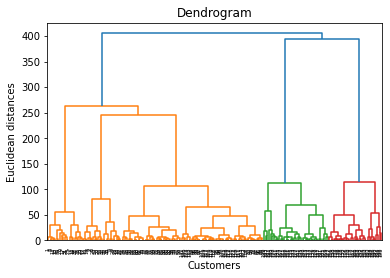

In [5]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()
#method=’single’
#method=’complete’ 
#method=’average’
#method=’weighted’
#method=’centroid’ 
#method=’median’
#metric = 'Euclidean'


In [6]:
#sch.linkage(x, method = 'ward')

In [14]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=6, affinity= 'euclidean', linkage = 'ward' )
#“euclidean”, “l1”, “l2”, “manhattan”, “cosine”, or “precomputed”
y_hc = hc.fit_predict(x)
hc.labels_
print(x[y_hc == 0,0])
print(x[y_hc == 0, 1])
from sklearn import set_config
set_config(print_changed_only=False)
hc

[ 69  70  71  71  71  72  73  73  74  75  76  77  77  78  78  78  78  78
  78  79  81  85  86  87  87  87  88  88  93  97  98  99 101 103 103 113
 120 126 137]
[91 77 95 75 75 71 88 73 72 93 87 97 74 90 88 76 89 78 73 83 93 75 95 63
 75 92 86 69 90 86 88 97 68 85 69 91 79 74 83]


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=6)

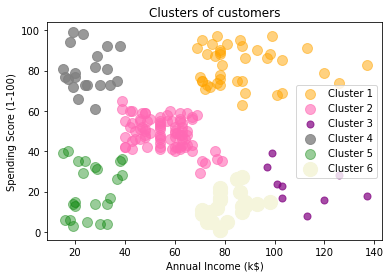

In [13]:
colors = np.array(["red","green","blue","yellow","pink","black","orange","purple","beige","brown","gray","cyan","magenta"])
plt.scatter(x[y_hc == 0,0], x[y_hc == 0, 1], c='orange', s=100, alpha=0.5, label = 'Cluster 1')
plt.scatter(x[y_hc == 1,0], x[y_hc == 1, 1], c='hotpink', s=100, alpha=0.6, label = 'Cluster 2')
plt.scatter(x[y_hc == 2,0], x[y_hc == 2, 1], c='purple', s=50, alpha=0.7, label = 'Cluster 3')
plt.scatter(x[y_hc == 3,0], x[y_hc == 3, 1], c='gray', s=100, alpha=0.8, label = 'Cluster 4')
plt.scatter(x[y_hc == 4,0], x[y_hc == 4, 1], c='green', s=100, alpha=0.4, label = 'Cluster 5')
plt.scatter(x[y_hc == 5,0], x[y_hc == 5, 1], c='beige', s=200, alpha=1, label = 'Cluster 6')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# K-Means Clustering

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


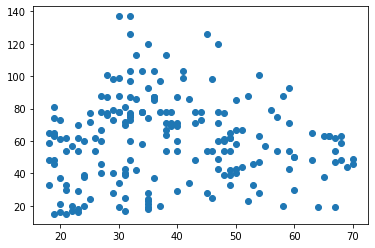

In [32]:
print(dataset.head(5))
plt.scatter(dataset['Age'],dataset['Annual Income (k$)'])
X = dataset.iloc[:, [3, 4]].values

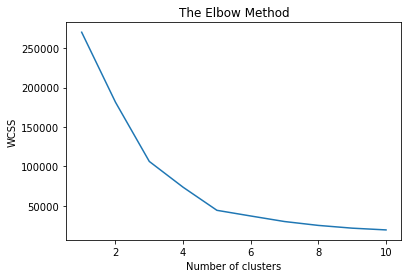

In [61]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [62]:
from sklearn import set_config
set_config(print_changed_only=False)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, init = 'k-means++', random_state = 60)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs='deprecated',
       precompute_distances='deprecated', random_state=60, tol=0.0001,
       verbose=0)

In [63]:
y_pred = kmeans.fit_predict(dataset[['Age','Annual Income (k$)']])
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 4, 4, 4, 4, 0, 4, 4, 0, 4, 4, 4, 0,
       4, 4, 0, 0, 4, 4, 4, 4, 4, 0, 4, 4, 0, 4, 4, 0, 4, 4, 0, 4, 4, 0,
       0, 4, 4, 0, 4, 0, 0, 0, 4, 0, 4, 0, 0, 4, 4, 0, 4, 0, 4, 4, 4, 4,
       4, 0, 0, 0, 0, 0, 4, 4, 4, 4, 0, 2, 2, 2, 0, 2, 2, 2, 4, 2, 2, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

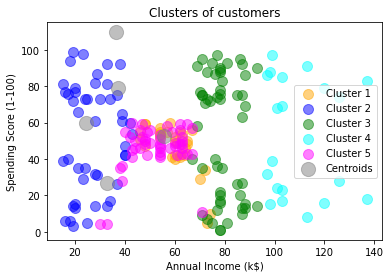

In [64]:
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s = 100, alpha = 0.5, c = 'orange', label = 'Cluster 1')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s = 100, alpha = 0.5,c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s = 100,alpha = 0.5, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_pred == 3, 0], X[y_pred == 3, 1], s = 100,alpha = 0.5, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_pred == 4, 0], X[y_pred == 4, 1], s = 100,alpha = 0.5, c = 'magenta', label = 'Cluster 5')
#plt.scatter(X[y_pred == 5, 0], X[y_pred == 5, 1], s = 100,alpha = 0.5, c = 'hotpink', label = 'Cluster 6')
#plt.scatter(X[y_pred == 6, 0], X[y_pred == 6, 1], s = 100,alpha = 0.5, c = 'red', label = 'Cluster 7')
#plt.scatter(X[y_pred == 7, 0], X[y_pred == 7, 1], s = 100,alpha = 0.5, c = 'beige', label = 'Cluster 8')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],alpha = 0.5, s = 200, c = 'Gray', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()